# Titanic

In [30]:
#la colonne "survived" est la colonne que l'on veut predire (Y)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydot
import graphviz
import pydotplus


1 - Chargement des données

In [31]:
# importation du jeu de données d'entrainement
traindeb = pd.read_csv('titanic_train.csv')
train=traindeb.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#importation du jeu de données de test 
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>




2 - Prétraitement des données

In [34]:
train.info() #on remarque que l'on a des données manquente dans Age et Cabin
#test.info()
train.describe()
train["Embarked"].value_counts().index.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


['S', 'C', 'Q']

In [35]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# Changement de la variable Sex contenant male et female par 0 et 1
# train['Sex2']=np.where(train.Sex == "male", 0, 1)
train.replace(to_replace=dict(female=1, male=0, Q=2, S=1, C=0), inplace=True)
print(train[:5])


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN       1.0  
1          PC 17599  71.2833   C85       0.0  
2  STON/O2. 3101282   7.9250   NaN       1.0  
3            113803  53.1000  C123       1.0  
4            373450   8.0500   NaN       1.0  


In [37]:
test.replace(to_replace=dict(female=1, male=0), inplace=True)
test.replace(to_replace=dict(Q=2, S=1, C=0), inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [38]:
#suprimer des colonnes inninteressantes
columns = ['Name', 'Ticket', 'Cabin'] #'PassengerId',
train.drop(columns, inplace=True, axis=1)
print(train.columns)

test.drop(columns, inplace=True, axis=1)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


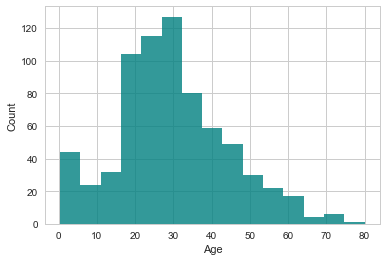

29.69911764705882


28.0

In [39]:
ax = train["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()
print(train["Age"].mean())
train["Age"].median(skipna=True)


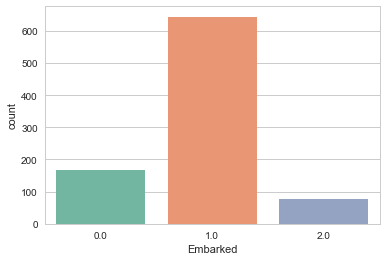

In [40]:
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Embarked',data=train,palette='Set2')
plt.show() #Q=2, S=1, C=0

In [41]:
# Enlever les lignes ou il y a des Nan
# la fonction dropna(axis=0, how="any") ne fonctionne pas ici
#index_nan=train[(train['Embarked'] != 'S')&(train['Embarked'] != 'C')&(train['Embarked'] != 'Q')].index
#print(index_nan) #61, 829
#train.drop(index_nan, inplace=True)
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


In [42]:
# imputation des valeurs manquantes surtout pour la colonne Age
for i in train.columns:
    train[i] = train[i].fillna(train[i].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


In [43]:
#test["Age"] = test["Age"].fillna(test["Age"].median())
#test["Embarked"] = test["Embarked"].fillna(test["Embarked"].median())
#test["Fare"] = test["Fare"].fillna(test["Fare"].median())
for i in test.columns:
    test[i] = test[i].fillna(test[i].median())
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [44]:
print(train.shape) # dimention de la base de données train
print(test.shape)

(891, 9)
(418, 8)


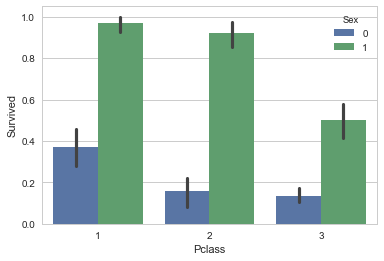

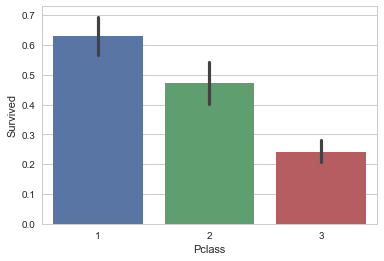

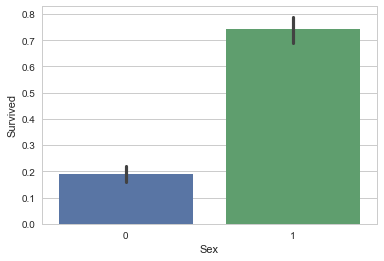

In [45]:
sns.barplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

sns.barplot('Pclass', 'Survived', data=train)
plt.show()

sns.barplot('Sex', 'Survived', data=train)
plt.show()



3 - Création de nouvelle variable

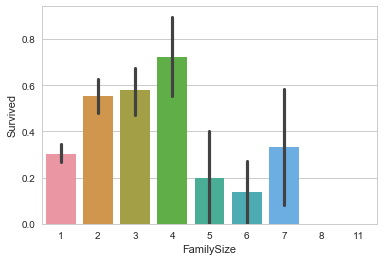

In [46]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

familySurvived = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(['Survived'], ascending = True)
familySurvived
sns.barplot(train['FamilySize'], train['Survived'])
plt.show()

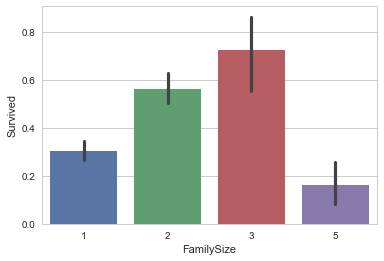

In [47]:
liste_de_valeur = [0,1,3, 4, 11]
train['FamilySize'] = pd.cut(train['FamilySize'], bins=liste_de_valeur, labels= [1,2,3,5])
sns.barplot(train['FamilySize'], train['Survived'])
plt.show()

In [48]:
train = train.drop("PassengerId", axis=1)

4 - Split des données Train/Test

ici le jeu de test est celui de kaggle, nous ne connaissons pas les reponsses

In [49]:
columns = ["SibSp","Parch", "Fare", "Embarked"]
train.drop(columns, inplace=True, axis=1)
test.drop(columns, inplace=True, axis=1)

y=train.Survived
x=train.drop("Survived", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

#x_train

5 - Entrainement  (descente de gradien, affichage erreur)

In [50]:
'''
#Analyse en Composantes Principales

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# définition de la commande
pca = PCA()
# Estimation, calcul des composantes principales
C = pca.fit(x_train)
C = C.transform(x_train)

# Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

plt.boxplot(C)
plt.show()

#plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
#plt.show()

'''

'\n#Analyse en Composantes Principales\n\nfrom sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n# définition de la commande\npca = PCA()\n# Estimation, calcul des composantes principales\nC = pca.fit(x_train)\nC = C.transform(x_train)\n\n# Décroissance de la variance expliquée\nplt.plot(pca.explained_variance_ratio_)\nplt.show()\n\nplt.boxplot(C)\nplt.show()\n\n#plt.scatter(C[:,0], C[:,1], c=y, label=target_name)\n#plt.show()\n\n'

Logistic Regression 
>(modele de régression logistique apprentissage automatique)

In [51]:
regL=linear_model.LogisticRegression()
regL

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#on fait l'entrainement via la commande fit
regL.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Decision Tree Classifier 

>( Arbre de decission apprentissage automatique)

In [53]:
regT=tree.DecisionTreeClassifier()

In [54]:
regT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

K-Nearest Neighbors  
>(k plus proches voisin, apprentissage supervisé)

In [55]:
regK = KNeighborsClassifier().fit(x_train, y_train)
regK

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Regression Bayesian Ridge
> Native regression Bayesien

In [56]:
regB = GaussianNB().fit(x_train, y_train)
regB

GaussianNB(priors=None)

# Fonction :

In [57]:
def entrainement():
    listEnt=[]
    listEnt.append(linear_model.LogisticRegression().fit(x_train, y_train))
    listEnt.append(GaussianNB().fit(x_train, y_train))
    listEnt.append(tree.DecisionTreeClassifier().fit(x_train, y_train))
    listEnt.append(KNeighborsClassifier().fit(x_train, y_train))
    listEnt.append(LinearSVC().fit(x_train, y_train))
    return listEnt

entr = entrainement()
entr

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 GaussianNB(priors=None),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_s

6 - Verification de la performance sur le jeu de donnée test

In [58]:
print(regL.score(x_train, y_train))
regL.score(x_test, y_test)

0.8041733547351525


0.8171641791044776

In [59]:
predictL = regL.predict(x_test)
predictL

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [60]:
regL.coef_ #The weights w of the model can be access

array([[-0.92431155,  2.56205863, -0.02808022, -0.28273746]])

In [61]:
regL.intercept_

array([1.86612323])

In [62]:
print(regB.score(x_train, y_train))
regB.score(x_test, y_test)

0.7945425361155698


0.7835820895522388

In [63]:
predictB = regB.predict(x_test)

In [64]:
regT.score(x_train, y_train)

0.9069020866773676

In [65]:
regT.score(x_test, y_test)

0.7723880597014925

In [66]:
predictT = regT.predict(test)
predictT.shape

(418,)

In [67]:
dot_data = StringIO()
tree.export_graphviz(regT, out_file=dot_data, feature_names = x_train.columns) #, filled=True, rounded=True)

#graphTitanic = graphviz.Source(graph)
#graphTitanic

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#graph.write_pdf("titanicGraph.pdf")

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [68]:
#regT.predict_proba(x_train[:1, :])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
dtypes: float64(1), int64(3)
memory usage: 13.1 KB


In [69]:
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictT}) 
my_submission.to_csv('submissionT.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [70]:
regK.score(x_train, y_train)

0.826645264847512

In [71]:
regK.score(x_test, y_test)

0.7611940298507462

In [72]:
predictK = regK.predict(x_test)
predictK

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)